<a href="https://colab.research.google.com/github/manzajmm/Entregas/blob/main/Algoritmo_de_Clasificaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***CREDIT LADER INTERNATIONAL***

# ***INTRODUCCIÓN***

Somos una empresa financiera que se dedica a otorgar créditos. Nuestra función es analizar el perfil del cliente, es decir, si cumple con los requisitos para recibir un crédito en base a sus caracterísiticas, las cuales desarrollaremos más adelante.

Credit Lader International está conformada por:

-Leandro Sueldo

-Sabrina Benvenuto

-Juan Martin Manzanares

-Luca Robledo

CLI nació a raíz de la pandemia del 2020 para brindar sustento a aquellas personas cuyos ingresos disminuyeron debido al aislamiento o se encontraron desempleados, por lo cual optaron por solicitar un préstamo a nuestra compañía

# ***MODELO DATA SCIENCE***

Nuestro problema de negocio es identificar mediante la ejecución de un algoritmo si las personas solicitantes al crédito aplican o no al mismo según ciertos criterios. 

# ***DATA ACQUISITION***

La fuente original que utilizamos para el análisis lo obtuvimos a través de la página Kaggle. Podrá visualizarse por medio del siguiente link: https://docs.google.com/spreadsheets/d/1ozZ9RczhqHwxfolAMCTCmgC2Ft6QCsUu/edit?usp=sharing&ouid=108211289058967970465&rtpof=true&sd=true Es necesario aclarar que la misma fue modificada a lo largo del trabajo para facilitar nuestro análisis y amoldarla a nuestro objetivo.

Los variables que incluiremos en nuestro análisis son las siguientes:

*   CODE_GENDER = Género.
*   FLAG_OWN_CAR = Posee o no autómovil.
*   FLAG_OWN_REALTY = Posee o no propiedades.
*   CNT_CHILDREN = Cantidad de hijos.
*   AMT_INCOME_TOTAL = Ingresos anuales.
*   NAME_INCOME_TYPE = Tipo de ingreso.
*   NAME_EDUCATION_TYPE = Nivel de educación.
*   NAME_FAMILY_STATUS = Estado civil.
*   NAME_HOUSING_TYPE = Dónde vive.
*   DAYS_BIRTH = Cumpleaños. Cuenta hacia atrás desde el día actual (0), -1 significa ayer
*   DAYS_EMPLOYED = Días desde los que fue contratado. Cuenta hacia atrás desde el día actual (0). Si es positivo, significa que la persona actualmente está desempleada.
*   FLAG_MOBIL = Posee o no teléfono celular.
*   FLAG_WORK_PHONE = Posee o no teléfono laboral.
*   FLAG_PHONE = Posee o no teléfono.
*   FLAG_EMAIL = Posee o no e-mail.
*   OCCUPATION_TYPE = Ocupación.
*   CNT_FAM_MEMBERS = Tamaño de la familia.
*   STATUS = Estado de pago del crédito (0: pagó en término, 1: adeuda cuota)

Los datos anteriormente mencionados fueron recopilados a través de diferentes entrevistas realizadas a las personas que solicitaron el crédito. Consideramos que son relevantes para nuestro análisis porque nos permite identificar aquellos usuarios beneficiosos, cumplidores y de interés para CLI.

# ***DATA WRANGLING / EDA***

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df1 = pd.read_csv("Scoring.csv", sep=';')
df2 = pd.read_csv("Credit_record.csv", sep=';')

***Observamos los primeros diez registros del dataset.***

In [ ]:
df1.head(10)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
7,5008812,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
8,5008813,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0
9,5008814,F,N,Y,0,283500.0,Pensioner,Higher education,Separated,House / apartment,-22464,365243,1,0,0,0,NaN,1.0


**Conocemos los nombres de cada columna.**

In [ ]:
df1.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS'],
      dtype='object')

***Buscamos entender los distintos tipos de datos almacenados en el dataset y por columna.***

In [ ]:
df1.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
dtype: object

***Con shape, conocemos el tamaño de nuestro conjunto de datos.***

In [ ]:
df1.shape

(438557, 18)

***Cercioramos estar trabajando con un pandas DataFrame.***

In [ ]:
type(df1)

pandas.core.frame.DataFrame

***Observamos la cantidad de registros por variable. Notamos un faltante de datos en la columna OCCUPATION_TYPE.***

In [ ]:
df1.count()

ID                     438557
CODE_GENDER            438557
FLAG_OWN_CAR           438557
FLAG_OWN_REALTY        438557
CNT_CHILDREN           438557
AMT_INCOME_TOTAL       438557
NAME_INCOME_TYPE       438557
NAME_EDUCATION_TYPE    438557
NAME_FAMILY_STATUS     438557
NAME_HOUSING_TYPE      438557
DAYS_BIRTH             438557
DAYS_EMPLOYED          438557
FLAG_MOBIL             438557
FLAG_WORK_PHONE        438557
FLAG_PHONE             438557
FLAG_EMAIL             438557
OCCUPATION_TYPE        304354
CNT_FAM_MEMBERS        438557
dtype: int64

***Confirmamos la ausencia de datos con la funcion info.***

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

***A continuacion decidimos seguir adelante sin la columna OCCUPATION_TYPE en nuestro dataset.***

In [ ]:
df1 = df1.drop(['OCCUPATION_TYPE'], axis=1)
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0


***Usamos la funcion describe, para poder obervar los datos estadisticos de las variables numericas***

In [ ]:
df1['NAME_INCOME_TYPE'].unique()

array(['Working', 'Commercial associate', 'Pensioner', 'State servant',
       'Student'], dtype=object)

In [ ]:
df1['NAME_INCOME_TYPE'].describe()

count      438557
unique          5
top       Working
freq       226104
Name: NAME_INCOME_TYPE, dtype: object

In [ ]:
df1['NAME_INCOME_TYPE'].value_counts()

Working                 226104
Commercial associate    100757
Pensioner                75493
State servant            36186
Student                     17
Name: NAME_INCOME_TYPE, dtype: int64

***Analizamos el DataFrame2***

In [ ]:
df2.head(10)

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,X
1,1,5001711,-1,0
2,2,5001711,-2,0
3,3,5001711,-3,0
4,4,5001712,0,C
5,5,5001712,-1,C
6,6,5001712,-2,C
7,7,5001712,-3,C
8,8,5001712,-4,C
9,9,5001712,-5,C


In [ ]:
df2.dtypes

Unnamed: 0         int64
ID                 int64
MONTHS_BALANCE     int64
STATUS            object
dtype: object

In [ ]:
df2['ID'].duplicated()

0          False
1           True
2           True
3           True
4          False
           ...  
1048570     True
1048571     True
1048572     True
1048573     True
1048574     True
Name: ID, Length: 1048575, dtype: bool

In [ ]:
df2.columns

Index(['Unnamed: 0', 'ID', 'MONTHS_BALANCE', 'STATUS'], dtype='object')

In [ ]:
df2.count()

Unnamed: 0        1048575
ID                1048575
MONTHS_BALANCE    1048575
STATUS            1048575
dtype: int64

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1048575 non-null  int64 
 1   ID              1048575 non-null  int64 
 2   MONTHS_BALANCE  1048575 non-null  int64 
 3   STATUS          1048575 non-null  object
dtypes: int64(3), object(1)
memory usage: 32.0+ MB


In [ ]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1048575.0,5.242870e+05,302697.673593,0.0,262143.5,524287.0,786430.5,1048574.0
ID,1048575.0,5.068286e+06,46150.578505,5001711.0,5023644.0,5062104.0,5113856.0,5150487.0
MONTHS_BALANCE,1048575.0,-1.913700e+01,14.023498,-60.0,-29.0,-17.0,-7.0,0.0


In [ ]:
df2['STATUS'].describe()

count     1048575
unique          8
top             C
freq       442031
Name: STATUS, dtype: object

In [ ]:
df2['STATUS'].value_counts()

C    442031
0    383120
X    209230
1     11090
5      1693
2       868
3       320
4       223
Name: STATUS, dtype: int64

In [ ]:
df3 = df2.drop_duplicates(["ID"], keep = "first")
df3.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,X
4,4,5001712,0,C
23,23,5001713,0,X
45,45,5001714,0,X
60,60,5001715,0,X


***Unimos ambos DataFrames según ID***

In [ ]:
merge1=df1.merge(df3, on=['ID'],how='inner')
merge1

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Unnamed: 0,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,92938,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,92954,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,92969,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,92999,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,93004,-22,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,-2420,1,0,0,0,2.0,1040847,0,5
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,2.0,1040943,0,C
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,-1325,1,0,1,1,2.0,1041024,0,C
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,-655,1,0,0,0,2.0,1044484,0,2


In [ ]:
import missingno as msno

msno.matrix(merge1)

ModuleNotFoundError: No module named 'missingno'

***Vamos a analizar cuantos datos terminan estando en ambos Dataframes (descartamos aquellos cuyo id no esta en ambas tablas por no tener valores coincidentes)***

In [ ]:
merge1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   36457 non-null  int64  
 1   CODE_GENDER          36457 non-null  object 
 2   FLAG_OWN_CAR         36457 non-null  object 
 3   FLAG_OWN_REALTY      36457 non-null  object 
 4   CNT_CHILDREN         36457 non-null  int64  
 5   AMT_INCOME_TOTAL     36457 non-null  float64
 6   NAME_INCOME_TYPE     36457 non-null  object 
 7   NAME_EDUCATION_TYPE  36457 non-null  object 
 8   NAME_FAMILY_STATUS   36457 non-null  object 
 9   NAME_HOUSING_TYPE    36457 non-null  object 
 10  DAYS_BIRTH           36457 non-null  int64  
 11  DAYS_EMPLOYED        36457 non-null  int64  
 12  FLAG_MOBIL           36457 non-null  int64  
 13  FLAG_WORK_PHONE      36457 non-null  int64  
 14  FLAG_PHONE           36457 non-null  int64  
 15  FLAG_EMAIL           36457 non-null 

In [ ]:
merge1.shape

(36457, 20)

# ***ANÁLISIS UNIVARIADO***

***Con el siguiente grafico de barras notamos claramente una mayor cantidad de clientes cuyo ingreso proviene de un trabajo en relacion de dependencia.***

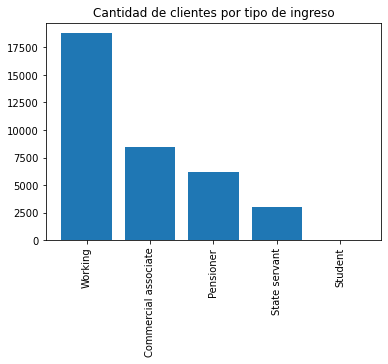

In [ ]:
eje_x = merge1['NAME_INCOME_TYPE'].unique()
eje_y = merge1['NAME_INCOME_TYPE'].value_counts()

plt.bar(eje_x, eje_y)

plt.title('Cantidad de clientes por tipo de ingreso')
plt.xticks(rotation=90)
plt.show()

***Procedemos a calcular las frecuencias absolutas y relativas, como asi tambien sus valores acumulados.***

In [ ]:
freq_abs = pd.Series(merge1['NAME_INCOME_TYPE']).value_counts()
rel_freq = freq_abs / len(merge1['NAME_INCOME_TYPE'])
df = pd.concat([freq_abs, rel_freq], axis=1)
df.columns = ['freq_absoluta', 'freq_relativa']
df

,freq_absoluta,freq_relativa
Working,18819,0.516197
Commercial associate,8490,0.232877
Pensioner,6152,0.168747
State servant,2985,0.081877
Student,11,0.000302


In [ ]:
abs_freq_val = freq_abs.values

count = 0
abs_acum = []
for e in abs_freq_val:
  count = count + e
  abs_acum.append(count)

df['freq_abs_acum'] = abs_acum
df

,freq_absoluta,freq_relativa,freq_abs_acum
Working,18819,0.516197,18819
Commercial associate,8490,0.232877,27309
Pensioner,6152,0.168747,33461
State servant,2985,0.081877,36446
Student,11,0.000302,36457


In [ ]:
rel_freq_val = df['freq_relativa'].values
count = 0
rel_acum = []
for e in rel_freq_val:
  count = count + e
  rel_acum.append(count)

df['freq_rel_acum'] = rel_acum
df = df[['freq_absoluta','freq_abs_acum','freq_relativa','freq_rel_acum']]


***Observando la tabla vemos que mas del cincuenta por ciento de los clientes trabajan en relacion de dependencia.***

In [ ]:
df

,freq_absoluta,freq_abs_acum,freq_relativa,freq_rel_acum
Working,18819,18819,0.516197,0.516197
Commercial associate,8490,27309,0.232877,0.749074
Pensioner,6152,33461,0.168747,0.917821
State servant,2985,36446,0.081877,0.999698
Student,11,36457,0.000302,1.000000


***Con este grafico podemos darnos cuenta que la cantidad de clientes de sexo femenino es mayor.***

C:\Users\Leandro\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Cantidad de clientes divididos por su género'}, xlabel='CODE_GENDER', ylabel='count'>

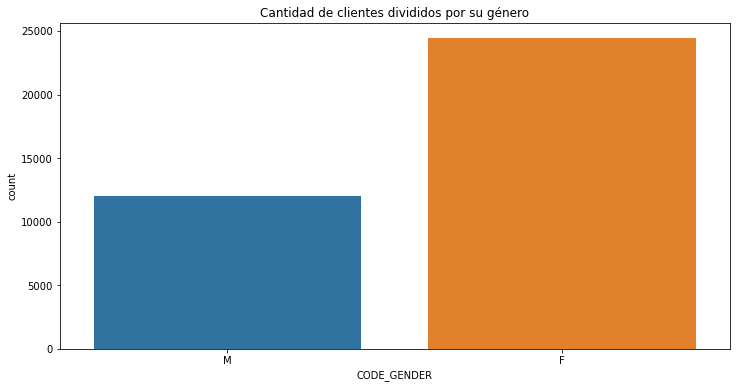

In [ ]:
plt.figure(figsize=(12,6))
plt.title('Cantidad de clientes divididos por su género')
sns.countplot(merge1.CODE_GENDER)

***Calculamos cuantos desempleados hay***

In [ ]:
df4 = merge1.apply(lambda x: x['DAYS_EMPLOYED'] > 0, axis=1).sum()
df4

6135

In [ ]:
Desempleados = round((df4 * 100) / len(merge1['DAYS_EMPLOYED']))
Desempleados

17

***Graficamos la cantidad de clientes que poseen propiedades y los que no***

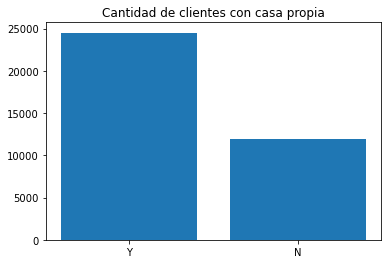

In [ ]:
x_values = merge1['FLAG_OWN_REALTY'].unique()
y_values = merge1['FLAG_OWN_REALTY'].value_counts().tolist()
plt.bar(x_values, y_values)
plt.title('Cantidad de clientes con casa propia')
plt.show()
plt.close('all')

# ***ANÁLISIS BIVARIADO***

***En el siguiente gráfico buscamos conocer la relación existente entre el tipo de ocupación de las personas que solicitan el crédito con su nivel de ingreso.*** 

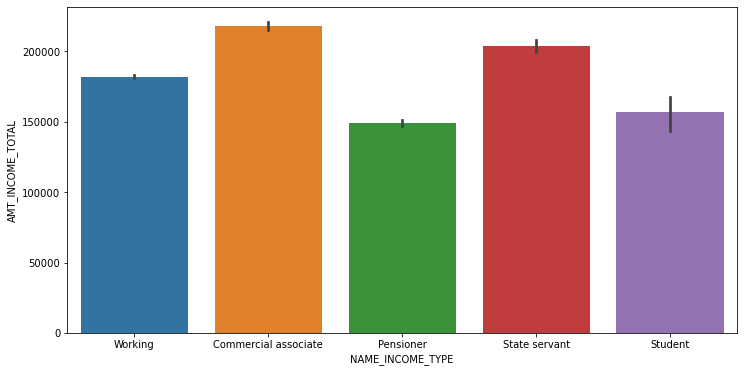

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_INCOME_TYPE', y = 'AMT_INCOME_TOTAL', data= merge1)
plt.show()

***Observamos que los que se desempeñan como "Commercial Associate" tienen el mayor nivel de ingreso.***

***Por otro lado, queremos conocer la relación entre el sexo de la persona y su nivel de ingreso.***

<AxesSubplot:xlabel='CODE_GENDER', ylabel='AMT_INCOME_TOTAL'>

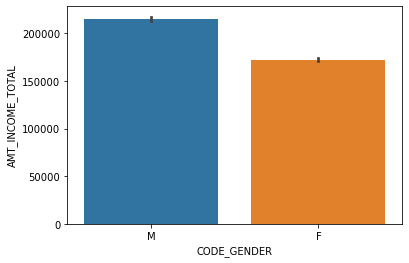

In [ ]:
sns.barplot(x='CODE_GENDER', y= 'AMT_INCOME_TOTAL', data = merge1)

***Según el gráfico, concluimos que el género masculino tiene un nivel de ingreso mayor que el femenino.***

***Graficamos las medidas de tendencia central de los distintos tipos de ocupaciones con los niveles de ingreso.***

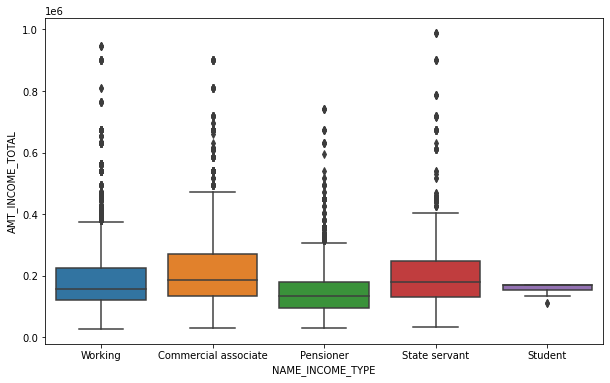

In [ ]:
plt.figure(figsize=(10,6))
amt_2 = merge1['AMT_INCOME_TOTAL'] < 1000000
sns.boxplot(x="NAME_INCOME_TYPE", y="AMT_INCOME_TOTAL", data=merge1[amt_2])
plt.show()

***Queremos observar la relación existente entre el estado civil y el nivel de ingreso.***

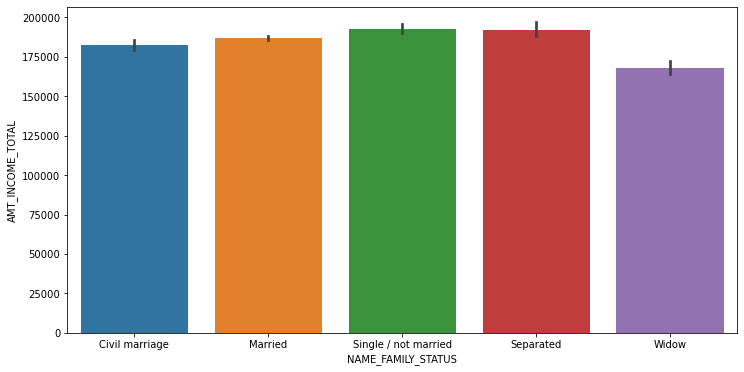

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x ='NAME_FAMILY_STATUS', y = 'AMT_INCOME_TOTAL', data= merge1)
plt.show()

***Visualizamos que a rasgo general las personas con distintos estados civiles tienen un nivel de ingreso bastante similar.***

***Por último, nos interesa conocer el efecto que produce el nivel de estudio alcanzado con el ingreso.***

<AxesSubplot:xlabel='NAME_EDUCATION_TYPE', ylabel='AMT_INCOME_TOTAL'>

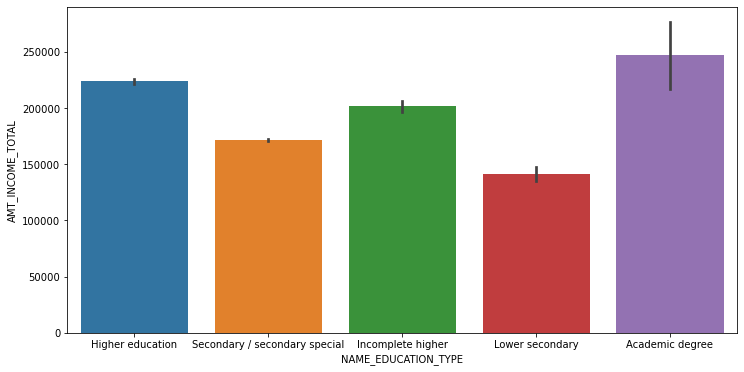

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x='NAME_EDUCATION_TYPE', y= 'AMT_INCOME_TOTAL', data = merge1)

***Como es de esperar, las personas con un título académico tienen mayor nivel de ingreso. En contraposición, los solicitantes al 
crédito con secundario incompleto, son los que poseen menor ingeso.***

# ***ANÁLISIS MULTIVARIADO***

***Analizamos el nivel de educacion alcanzado respecto al ingreso total y separamos en genero. Los hombres tienen mayores ingresos en todos los niveles académicos***

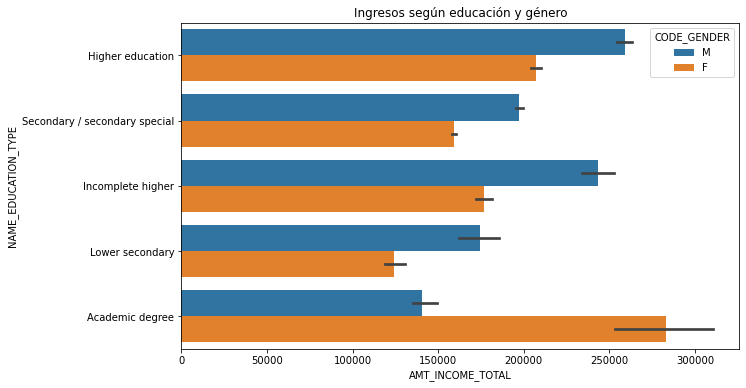

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Ingresos según educación y género')
sns.barplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='CODE_GENDER',data=merge1)
plt.show()

***En este caso, al comparar el nivel de educacion con el ingreso total y la posesion de bienes raices, nos damos cuenta que la mayoria de los clientes poseen al menos una propiedad.***

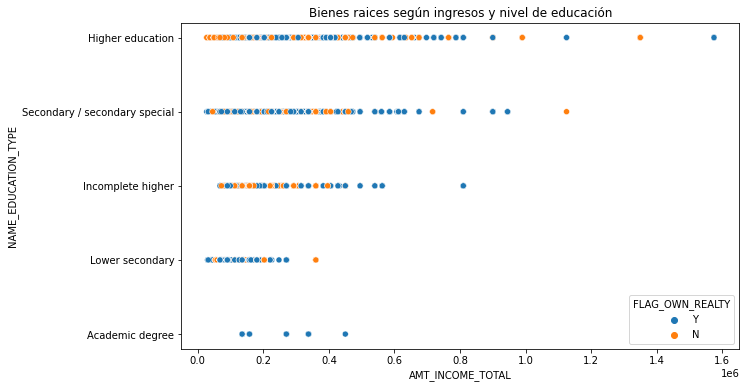

In [ ]:
plt.figure(figsize=(10,6))
plt.title('Bienes raices según ingresos y nivel de educación')
sns.scatterplot(x='AMT_INCOME_TOTAL',y='NAME_EDUCATION_TYPE',hue='FLAG_OWN_REALTY',data=merge1)
plt.show()

***Analizamos y comparamos los tipos de ingreso por género***

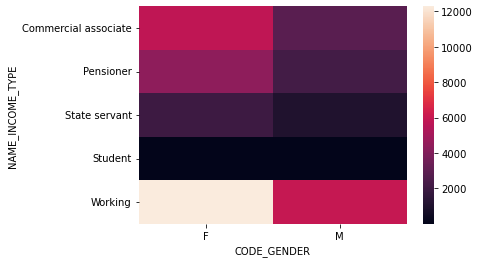

In [ ]:
sns.heatmap(pd.crosstab(df1['NAME_INCOME_TYPE'],merge1['CODE_GENDER']))
plt.show()

***Con el siguiente grafico, notamos un mayor numero de clientes de genero femenino.***

Text(0.5, 0.98, 'Cantidad de clientes discriminado por género, ingresos y educacion')

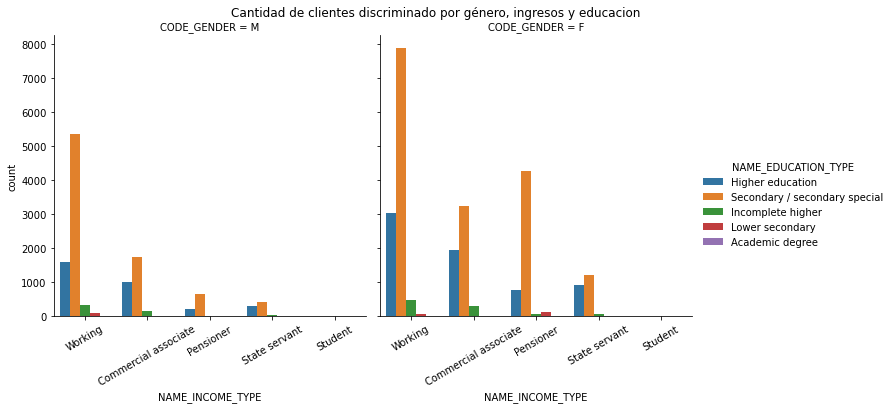

In [ ]:
g = sns.catplot(x="NAME_INCOME_TYPE", hue="NAME_EDUCATION_TYPE", col="CODE_GENDER",
                data=merge1, kind="count");
g.set_xticklabels(rotation=30)
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Cantidad de clientes discriminado por género, ingresos y educacion')

# ***DATASET***

In [ ]:
merge1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,Unnamed: 0,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,92938,0,C
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,92954,0,C
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,92969,0,C
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,92999,0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,93004,-22,X


# ***RANDOM FOREST***

In [ ]:
import urllib.request
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

***Modificamos el dataset para poder aplicar el algoritmo de Machine Learning***

In [ ]:
Gender = pd.get_dummies(df1["CODE_GENDER"])
Gender.head()

,F,M
0,0,1
1,0,1
2,0,1
3,1,0
4,1,0


In [ ]:
df1 = df1.assign(FEMALE = Gender["F"])
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1


In [ ]:
df1 = df1.assign(MALE = Gender["M"])
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,1
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0


In [ ]:
df1 = df1.drop(['CODE_GENDER'],axis = 1)
df1.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE
0,5008804,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
1,5008805,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
2,5008806,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,1
3,5008808,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0
4,5008809,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0


***Dentro de la columna FLAG_OWN_CAR convertimos sus variables categóricas a numéricas teniendo en cuenta el código binario: 1 en caso de ser positivo (Y), 0 en caso de ser negativo (N).***

In [ ]:
df1['FLAG_OWN_CAR'] = df1['FLAG_OWN_CAR'].replace(["Y","N"],[1,0])
df1.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE
0,5008804,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
1,5008805,1,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
2,5008806,1,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,1
3,5008808,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0
4,5008809,0,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0


In [ ]:
df1['FLAG_OWN_REALTY'] = df1['FLAG_OWN_REALTY'].replace(["Y","N"],[1,0])
df1.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE
0,5008804,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
1,5008805,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,2.0,0,1
2,5008806,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,2.0,0,1
3,5008808,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0
4,5008809,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,1.0,1,0


***Cambiamos la manera de ver los datos de la variable MONTHS_BALANCE, para facilitarnos el trabajo con esta columna.***

In [ ]:
df2['MONTHS_BALANCE'] = df2['MONTHS_BALANCE'].apply(lambda x: x*-1)
df2['MONTHS_BALANCE']

0           0
1           1
2           2
3           3
4           0
           ..
1048570    25
1048571    26
1048572    27
1048573    28
1048574    29
Name: MONTHS_BALANCE, Length: 1048575, dtype: int64

Continuamos con el DF2, realizando un reemplazo en la columna STATUS para facilitar nuestro análisis siguiendo el siguiente criterio:

-0 = Cuota al día, incluye los valores X, 0 y C.

-1 = En mora, incluye los valores 1, 2, 3, 4 y 5.

In [ ]:
df2['STATUS'].replace({'C': 0, 'X' : 0}, inplace=True)
df2['STATUS'] = df2['STATUS'].astype('int')
df2['STATUS'] = df2['STATUS'].apply(lambda x:1 if x >= 2 else 0)

In [ ]:
df3 = df2.drop_duplicates(["ID"], keep = "first")
df3.head()

,Unnamed: 0,ID,MONTHS_BALANCE,STATUS
0,0,5001711,0,0
4,4,5001712,0,0
23,23,5001713,0,0
45,45,5001714,0,0
60,60,5001715,0,0


In [ ]:
merge2=df1.merge(df3, on=['ID'],how='inner')
merge2

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,...,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE,Unnamed: 0,MONTHS_BALANCE,STATUS
0,5008804,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,1,0,0,2.0,0,1,92938,0,0
1,5008805,1,1,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,...,1,1,0,0,2.0,0,1,92954,0,0
2,5008806,1,1,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,...,1,0,0,0,2.0,0,1,92969,0,0
3,5008808,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,0,1,1,1.0,1,0,92999,0,0
4,5008809,0,1,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,...,1,0,1,1,1.0,1,0,93004,22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,1,1,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,-17348,...,1,0,0,0,2.0,0,1,1040847,0,1
36453,5149834,0,1,0,157500.0,Commercial associate,Higher education,Married,House / apartment,-12387,...,1,0,1,1,2.0,1,0,1040943,0,0
36454,5149838,0,1,0,157500.0,Pensioner,Higher education,Married,House / apartment,-12387,...,1,0,1,1,2.0,1,0,1041024,0,0
36455,5150049,0,1,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,-17958,...,1,0,0,0,2.0,1,0,1044484,0,1


***Por desconocimiento de qué método poder utilizar que sea compatible con variables cualitativas, elimino las variables de tipo STRING***

In [ ]:
data = merge2.drop(["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"], axis=1)
data.head()

,ID,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,FEMALE,MALE,Unnamed: 0,MONTHS_BALANCE,STATUS
0,5008804,1,1,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,1,92938,0,0
1,5008805,1,1,0,427500.0,-12005,-4542,1,1,0,0,2.0,0,1,92954,0,0
2,5008806,1,1,0,112500.0,-21474,-1134,1,0,0,0,2.0,0,1,92969,0,0
3,5008808,0,1,0,270000.0,-19110,-3051,1,0,1,1,1.0,1,0,92999,0,0
4,5008809,0,1,0,270000.0,-19110,-3051,1,0,1,1,1.0,1,0,93004,22,0


In [ ]:
data[['FEMALE','MALE','MONTHS_BALANCE','STATUS','CNT_FAM_MEMBERS']] = data[['FEMALE','MALE','MONTHS_BALANCE','STATUS','CNT_FAM_MEMBERS']].astype('int')
data[['FEMALE','MALE','MONTHS_BALANCE','STATUS','CNT_FAM_MEMBERS']].dtypes

FEMALE             int32
MALE               int32
MONTHS_BALANCE     int32
STATUS             int32
CNT_FAM_MEMBERS    int32
dtype: object

***Observo que ahora todas mis variables son cuantitativas***

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36457 entries, 0 to 36456
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                36457 non-null  int64  
 1   FLAG_OWN_CAR      36457 non-null  int64  
 2   FLAG_OWN_REALTY   36457 non-null  int64  
 3   CNT_CHILDREN      36457 non-null  int64  
 4   AMT_INCOME_TOTAL  36457 non-null  float64
 5   DAYS_BIRTH        36457 non-null  int64  
 6   DAYS_EMPLOYED     36457 non-null  int64  
 7   FLAG_MOBIL        36457 non-null  int64  
 8   FLAG_WORK_PHONE   36457 non-null  int64  
 9   FLAG_PHONE        36457 non-null  int64  
 10  FLAG_EMAIL        36457 non-null  int64  
 11  CNT_FAM_MEMBERS   36457 non-null  int32  
 12  FEMALE            36457 non-null  int32  
 13  MALE              36457 non-null  int32  
 14  Unnamed: 0        36457 non-null  int64  
 15  MONTHS_BALANCE    36457 non-null  int32  
 16  STATUS            36457 non-null  int32 

***Separo mi DF en X e Y, identificando como variable target la columna STATUS. Busco crear un modelo de predicción que me identifique aquellas personas que, según sus características, abonan a tiempo sus cuotas del crédito otorgado.***

In [ ]:
X = data.drop(["STATUS"], axis=1)
y = data["STATUS"]

***Separo en TRAIN y TEST, destinando un 30% de los datos para entrenar mi modelo.***

In [ ]:
(X_train, X_test,
y_train, y_test) = train_test_split(X,
                                    y,
                                    stratify=y,
                                    test_size=0.30,
                                    random_state=11)

***Creo mi árbol de decisión.***

In [ ]:
tree = DecisionTreeClassifier(random_state=11)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=11)

In [ ]:
y_test_pred = tree.predict(X_test) #Prediccion en Test

***Procedo a calcular el accuracy de mi TEST.***

In [ ]:
from sklearn.metrics import accuracy_score

test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9953373560065826


***Observo que al utilizar el método de Arbol de dicisión, mi test tuvo una performance del 98%. Ahora procedo a compararlo con un forest completo.***

In [ ]:
model = RandomForestClassifier(random_state=11, n_estimators=100,
                               class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_features='log2',
                       random_state=11)

In [ ]:
y_test_pred = model.predict(X_test) #Prediccion en Test

***Procedo a calcular el accuracy de mi TEST.***

In [ ]:
test_accuracy = accuracy_score(y_test, y_test_pred)

print('% de aciertos sobre el set de evaluación:',test_accuracy)

% de aciertos sobre el set de evaluación: 0.9963430243188883


***Observo que obtuve casi un 99% de aciertos, el modelo es bueno!***